In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from importlib import reload
from mppi import InputFiles as I, Calculators as C, Datasets as D

# Analysis of the spin polarization

We perform the analysis of the spin polarization for the neq distribution using the ypp_rt post-processing data.

We consider the various samplings of the k-points

## k = 8x8x8

In [2]:
data_dir = 'rt_k8/FixSymm'
last_time = '240.000'

In [3]:
# circular polarization spanning a given frequencies range
freq_range = [1.15,1.25,1.35,1.45,1.55,1.65,1.75,1.85]
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

We compute the total number of electrons in the conduction band, for a given frequency, (at the last simulation time) for each spin polarization

In [4]:
f = freq_range[4]
print('frequency = ',f)
file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
data_tot = C.dict_parser(file_tot)
data_up = C.dict_parser(file_up)
data_dn = C.dict_parser(file_dn)

frequency =  1.55


In [5]:
energies = data_tot['E']
carriers_up = data_up[last_time]
carriers_dn = data_dn[last_time]
carriers_tot = data_tot[last_time]

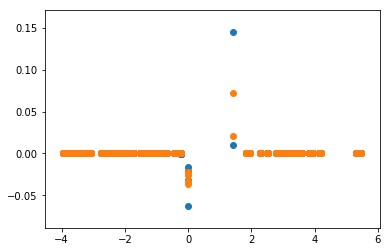

In [6]:
plt.scatter(energies,carriers_up)
plt.scatter(energies,carriers_dn)

See how the spin polarization emerges at E=1.418

In [7]:
indexes = []
for ind,e in enumerate(energies):
    if e == 1.418:
        indexes.append(ind)
indexes

[2048, 2049]

In [8]:
up_bin = sum(carriers_up[slice(indexes[0],indexes[-1]+1)])
dn_bin = sum(carriers_dn[slice(indexes[0],indexes[-1]+1)])
(up_bin-dn_bin)/(up_bin+dn_bin)*100

24.933665675002008

It can be interesting to see how polarization is realized in the states that contribute to this energy gap

In [9]:
up_bins = carriers_up[slice(indexes[0],indexes[-1]+1)]
dn_bins = carriers_dn[slice(indexes[0],indexes[-1]+1)]

In [10]:
print(up_bins)
print(dn_bins)
print((up_bins[0]-dn_bins[0])/(up_bins[0]+dn_bins[0])*100)
print((up_bins[1]-dn_bins[1])/(up_bins[1]+dn_bins[1])*100)

[0.01038, 0.145]
[0.07263, 0.02073]
-74.99096494398265
74.98340674591203


The total number of carriers in the conduction band is computed by integrating the carriers for energies > 0

In [11]:
cond_thrs = 0
for e in energies:
    if e>0:
        cond_thrs = energies.index(e)
        break
print(cond_thrs,energies[cond_thrs])

2048 1.418


In [12]:
cond_up = sum(carriers_up[cond_thrs:])
cond_dn = sum(carriers_dn[cond_thrs:])
cond_tot = sum(carriers_tot[cond_thrs:])
print(cond_up,cond_dn,cond_up+cond_dn,cond_tot)
delta = (cond_up-cond_dn)/cond_tot*100
print('spin polarization = ',delta)

0.15911853276139945 0.09685334029399993 0.25597187305539937 0.255952032000002
spin polarization =  24.32689906028917


We compute the spin polarization for all the frequency range

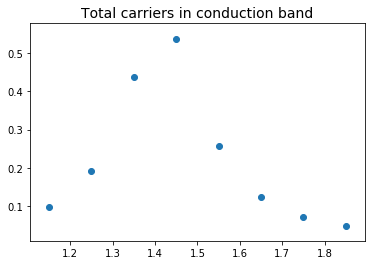

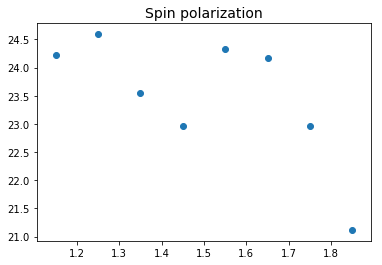

In [13]:
spin_pol = []
total_cond = []
for f in freq_range:
    file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
    file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
    file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
    data_tot = C.dict_parser(file_tot)
    data_up = C.dict_parser(file_up)
    data_dn = C.dict_parser(file_dn)
    energies = data_tot['E']
    carriers_up = data_up[last_time]
    carriers_dn = data_dn[last_time]
    carriers_tot = data_tot[last_time]
    cond_thrs = 0
    for e in energies:
        if e>0:
            cond_thrs = energies.index(e)
            break
    cond_up = sum(carriers_up[cond_thrs:])
    cond_dn = sum(carriers_dn[cond_thrs:])
    cond_tot = sum(carriers_tot[cond_thrs:])
    total_cond.append(cond_tot)
    spin_pol.append((cond_up-cond_dn)/cond_tot*100)
plt.scatter(freq_range,total_cond)
plt.title('Total carriers in conduction band',size = 14)
plt.show()
plt.title('Spin polarization',size = 14)
plt.scatter(freq_range,spin_pol)

## k = 8x8x8 shift

In [12]:
data_dir = 'rt_k8_shift/FixSymm/'
last_time = '240.000'

In [13]:
# circular polarization spanning a given frequencies range
freq_range = [1.15,1.25,1.35,1.45,1.55,1.65,1.75,1.85]
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

We compute the total number of electrons in the conduction band, for a given frequency, (at the last simulation time) for each spin polarization

In [14]:
f = freq_range[7]
print('frequency = ',f)
file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
data_tot = C.dict_parser(file_tot)
data_up = C.dict_parser(file_up)
data_dn = C.dict_parser(file_dn)

frequency =  1.85


In [15]:
energies = data_tot['E']
carriers_up = data_up[last_time]
carriers_dn = data_dn[last_time]
carriers_tot = data_tot[last_time]

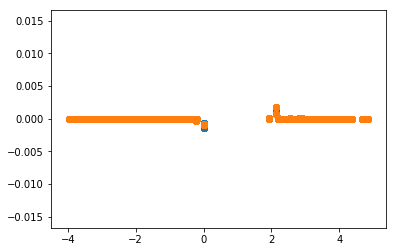

In [16]:
plt.scatter(energies,carriers_up)
plt.scatter(energies,carriers_dn)

The total number of carriers in the conduction band is computed by integrating the carriers for energies > 0

In [17]:
cond_thrs = 0
for e in energies:
    if e>0:
        cond_thrs = energies.index(e)
        break
print(cond_thrs,energies[cond_thrs])

8192 1.938


In [18]:
cond_up = sum(carriers_up[cond_thrs:])
cond_dn = sum(carriers_dn[cond_thrs:])
cond_tot = sum(carriers_tot[cond_thrs:])
print(cond_up,cond_dn,cond_up+cond_dn,cond_tot)
delta = (cond_up-cond_dn)/cond_tot*100
print('spin polarization = ',delta)

0.0309762544000002 0.03253215468000026 0.06350840908000047 0.0635055320000009
spin polarization =  -2.450023220024414


We compute the spin polarization for all the frequency range

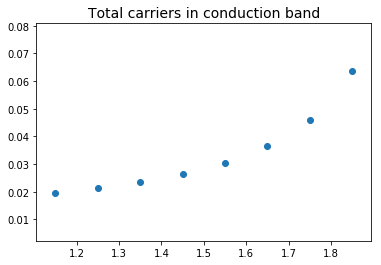

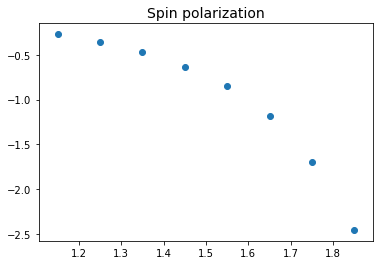

In [19]:
spin_pol = []
total_cond = []
for f in freq_range:
    file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
    file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
    file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
    data_tot = C.dict_parser(file_tot)
    data_up = C.dict_parser(file_up)
    data_dn = C.dict_parser(file_dn)
    energies = data_tot['E']
    carriers_up = data_up[last_time]
    carriers_dn = data_dn[last_time]
    carriers_tot = data_tot[last_time]
    cond_thrs = 0
    for e in energies:
        if e>0:
            cond_thrs = energies.index(e)
            break
    cond_up = sum(carriers_up[cond_thrs:])
    cond_dn = sum(carriers_dn[cond_thrs:])
    cond_tot = sum(carriers_tot[cond_thrs:])
    total_cond.append(cond_tot)
    spin_pol.append((cond_up-cond_dn)/cond_tot*100)
plt.scatter(freq_range,total_cond)
plt.title('Total carriers in conduction band',size = 14)
plt.show()
plt.title('Spin polarization',size = 14)
plt.scatter(freq_range,spin_pol)

## k = 10x10x10 shift

In [20]:
data_dir = 'rt_k10_shift/FixSymm/'
last_time = '240.000'

In [21]:
# circular polarization spanning a given frequencies range
freq_range = [1.15,1.25,1.35,1.45,1.55,1.65,1.75,1.85]
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

We compute the total number of electrons in the conduction band, for a given frequency, (at the last simulation time) for each spin polarization

In [22]:
f = freq_range[7]
print('frequency = ',f)
file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
data_tot = C.dict_parser(file_tot)
data_up = C.dict_parser(file_up)
data_dn = C.dict_parser(file_dn)

frequency =  1.85


In [23]:
energies = data_tot['E']
carriers_up = data_up[last_time]
carriers_dn = data_dn[last_time]
carriers_tot = data_tot[last_time]

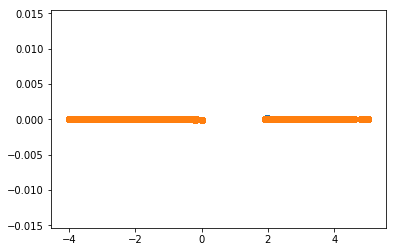

In [24]:
plt.scatter(energies,carriers_up)
plt.scatter(energies,carriers_dn)

The total number of carriers in the conduction band is computed by integrating the carriers for energies > 0

In [25]:
cond_thrs = 0
for e in energies:
    if e>0:
        cond_thrs = energies.index(e)
        break
print(cond_thrs,energies[cond_thrs])

16000 1.9


In [26]:
cond_up = sum(carriers_up[cond_thrs:])
cond_dn = sum(carriers_dn[cond_thrs:])
cond_tot = sum(carriers_tot[cond_thrs:])
print(cond_up,cond_dn,cond_up+cond_dn,cond_tot)
delta = (cond_up-cond_dn)/cond_tot*100
print('spin polarization = ',delta)

0.0022847337933999557 0.0012508106854000156 0.0035355444787999713 0.0035358767879999993
spin polarization =  29.2409258011719


We compute the spin polarization for all the frequency range

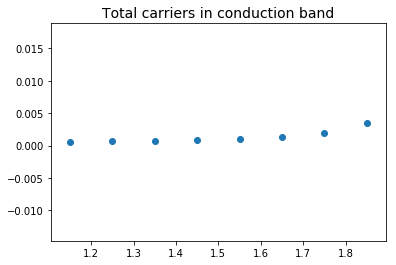

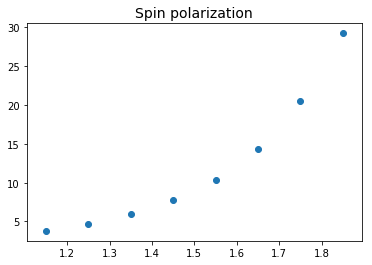

In [27]:
spin_pol = []
total_cond = []
for f in freq_range:
    file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
    file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
    file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
    data_tot = C.dict_parser(file_tot)
    data_up = C.dict_parser(file_up)
    data_dn = C.dict_parser(file_dn)
    energies = data_tot['E']
    carriers_up = data_up[last_time]
    carriers_dn = data_dn[last_time]
    carriers_tot = data_tot[last_time]
    cond_thrs = 0
    for e in energies:
        if e>0:
            cond_thrs = energies.index(e)
            break
    cond_up = sum(carriers_up[cond_thrs:])
    cond_dn = sum(carriers_dn[cond_thrs:])
    cond_tot = sum(carriers_tot[cond_thrs:])
    total_cond.append(cond_tot)
    spin_pol.append((cond_up-cond_dn)/cond_tot*100)
plt.scatter(freq_range,total_cond)
plt.title('Total carriers in conduction band',size = 14)
plt.show()
plt.title('Spin polarization',size = 14)
plt.scatter(freq_range,spin_pol)

## k = 100 random (k range of 0.1 centred in Gamma)

In [14]:
data_dir = 'rt_k100_random/FixSymm'
last_time = '240.000'

In [15]:
# circular polarization spanning a given frequencies range
freq_range = [1.15,1.25,1.35,1.45,1.55,1.65,1.75,1.85]
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

We compute the total number of electrons in the conduction band, for a given frequency, (at the last simulation time) for each spin polarization

In [16]:
f = freq_range[4]
print('frequency = ',f)
file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
data_tot = C.dict_parser(file_tot)
data_up = C.dict_parser(file_up)
data_dn = C.dict_parser(file_dn)

frequency =  1.55


In [17]:
energies = data_tot['E']
carriers_up = data_up[last_time]
carriers_dn = data_dn[last_time]
carriers_tot = data_tot[last_time]

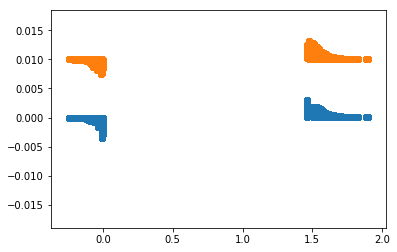

In [18]:
plt.scatter(energies,carriers_up)
plt.scatter(energies,0.01+np.array(carriers_dn))

The total number of carriers in the conduction band is computed by integrating the carriers for energies > 0

In [19]:
cond_thrs = 0
for e in energies:
    if e>0:
        cond_thrs = energies.index(e)
        break
print(cond_thrs,energies[cond_thrs])

19200 1.461


We identify the all the (positive) energy levels removing the degeneracies

In [20]:
cond_energies = energies[cond_thrs:]
cond_energies = sorted(list(set(cond_energies)))

and compute the spin polarization for a given energy level

In [23]:
eng_val = cond_energies[4]
indexes = []
for ind,e in enumerate(energies):
    if e == eng_val:
        indexes.append(ind)
#print(len(indexes))
#print(indexes)
up_bin = sum(carriers_up[slice(indexes[0],indexes[-1]+1)])
dn_bin = sum(carriers_dn[slice(indexes[0],indexes[-1]+1)])
delta = (up_bin-dn_bin)/(up_bin+dn_bin)*100
print(eng_val,delta)

1.479 -10.435086418344659


We investigate how the spin polarization for each energy level emerges. In other terms we compute the polarization
of all the states that contribute to a given energy

In [24]:
up_bins = carriers_up[slice(indexes[0],indexes[-1]+1)]
dn_bins = carriers_dn[slice(indexes[0],indexes[-1]+1)]

39.11016125898582
-39.12023460410557
87.84202265303527
-87.84790740140784
-87.84790740140784
87.84202265303527
-25.298484782703074
-25.298484782703074
25.339839665388634
25.339839665388634
39.11016125898582
-39.08450704225352
-39.08450704225352
39.11016125898582
-87.84790740140784
87.84202265303527
87.84202265303527
-87.84790740140784
-25.325464329109533
-25.325464329109533
25.339839665388634
25.339839665388634
-39.08450704225352
39.11016125898582
-39.08450704225352
39.11016125898582
-87.84790740140784
87.84202265303527
87.84202265303527
-87.84790740140784
25.339839665388634
25.339839665388634
-25.325464329109533
-25.325464329109533
-39.12023460410557
39.11016125898582
39.11016125898582
-39.12023460410557
87.84202265303527
-87.84790740140784
-87.84790740140784
87.84202265303527
25.339839665388634
25.339839665388634
-25.298484782703074
-25.298484782703074
39.11016125898582
-39.12023460410557


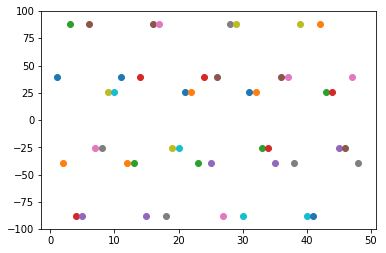

In [26]:
ind = 1
for up,dn in zip(up_bins,dn_bins): 
     print((up-dn)/(up+dn)*100)
     plt.scatter(ind,(up-dn)/(up+dn)*100)
     ind+=1

We plot the (integrated inside each level) polarization for all the energies

In [27]:
spin_pol = []
for eng_val in cond_energies:
    indexes = []
    for ind,e in enumerate(energies):
        if e == eng_val:
            indexes.append(ind)
    #print(len(indexes))
    up_bin = sum(carriers_up[slice(indexes[0],indexes[-1]+1)])
    dn_bin = sum(carriers_dn[slice(indexes[0],indexes[-1]+1)])
    spin_pol.append((up_bin-dn_bin)/(up_bin+dn_bin)*100)  


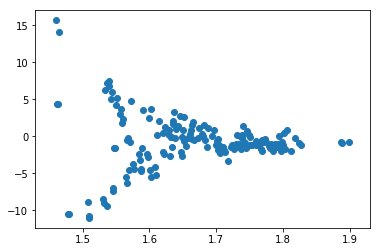

In [28]:
plt.scatter(cond_energies,spin_pol)

In [ ]:
#######################################################################

The total number of carriers in the conduction band is computed by integrating the carriers for energies > 0

In [130]:
cond_up = sum(carriers_up[cond_thrs:])
cond_dn = sum(carriers_dn[cond_thrs:])
cond_tot = sum(carriers_tot[cond_thrs:])
print(cond_up,cond_dn,cond_up+cond_dn,cond_tot)
delta = (cond_up-cond_dn)/cond_tot*100
print('spin polarization = ',delta)

2.8241443450000103 2.841999352999996 5.666143698000006 5.666101370000002
spin polarization =  -0.31511981226671054


We compute the spin polarization for all the frequency range

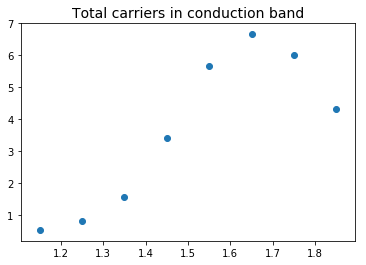

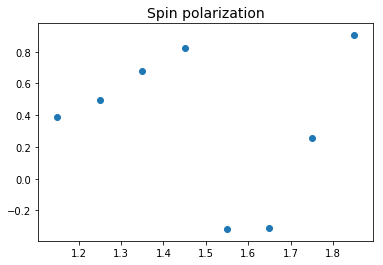

In [131]:
spin_pol = []
total_cond = []
for f in freq_range:
    file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
    file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
    file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
    data_tot = C.dict_parser(file_tot)
    data_up = C.dict_parser(file_up)
    data_dn = C.dict_parser(file_dn)
    energies = data_tot['E']
    carriers_up = data_up[last_time]
    carriers_dn = data_dn[last_time]
    carriers_tot = data_tot[last_time]
    cond_thrs = 0
    for e in energies:
        if e>0:
            cond_thrs = energies.index(e)
            break
    cond_up = sum(carriers_up[cond_thrs:])
    cond_dn = sum(carriers_dn[cond_thrs:])
    cond_tot = sum(carriers_tot[cond_thrs:])
    total_cond.append(cond_tot)
    spin_pol.append((cond_up-cond_dn)/cond_tot*100)
plt.scatter(freq_range,total_cond)
plt.title('Total carriers in conduction band',size = 14)
plt.show()
plt.title('Spin polarization',size = 14)
plt.scatter(freq_range,spin_pol)